In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
df = pd.read_csv("/content/drive/MyDrive/Dataset/Household energy bill data.csv")

In [ ]:
df

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


In [ ]:
#Info untuk melihat tipe data, null, jumlah entry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [ ]:
#Cek nilai null
df.isna().sum()

num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64

In [ ]:
#cek apakah ada data duplicate
df.duplicated().sum()

0

In [ ]:
#statistika deskriptif
df.describe() 

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


In [ ]:
#Mengecek dan mengatasi nilai negatif
for column in df.columns.values.tolist():
  print(f"Jumlah yang bernilai negatif (sebelum) di {column}: {(df[str(column)] < 0).sum()}")
for column in df.columns.values.tolist():
  df[str(column)] = df[str(column)].abs()
print('\n')
for column in df.columns.values.tolist():
  print(f"Jumlah yang bernilai negatif (setelah) di {column}: {(df[str(column)] < 0).sum()}")

Jumlah yang bernilai negatif (sebelum) di num_rooms: 5
Jumlah yang bernilai negatif (sebelum) di num_people: 4
Jumlah yang bernilai negatif (sebelum) di housearea: 0
Jumlah yang bernilai negatif (sebelum) di is_ac: 0
Jumlah yang bernilai negatif (sebelum) di is_tv: 0
Jumlah yang bernilai negatif (sebelum) di is_flat: 0
Jumlah yang bernilai negatif (sebelum) di ave_monthly_income: 6
Jumlah yang bernilai negatif (sebelum) di num_children: 0
Jumlah yang bernilai negatif (sebelum) di is_urban: 0
Jumlah yang bernilai negatif (sebelum) di amount_paid: 0


Jumlah yang bernilai negatif (setelah) di num_rooms: 0
Jumlah yang bernilai negatif (setelah) di num_people: 0
Jumlah yang bernilai negatif (setelah) di housearea: 0
Jumlah yang bernilai negatif (setelah) di is_ac: 0
Jumlah yang bernilai negatif (setelah) di is_tv: 0
Jumlah yang bernilai negatif (setelah) di is_flat: 0
Jumlah yang bernilai negatif (setelah) di ave_monthly_income: 0
Jumlah yang bernilai negatif (setelah) di num_children: 0
J

In [ ]:
#dataframe data numerik
dfn = df[['num_rooms', 'num_people','housearea', 'ave_monthly_income', 	'num_children','amount_paid']]

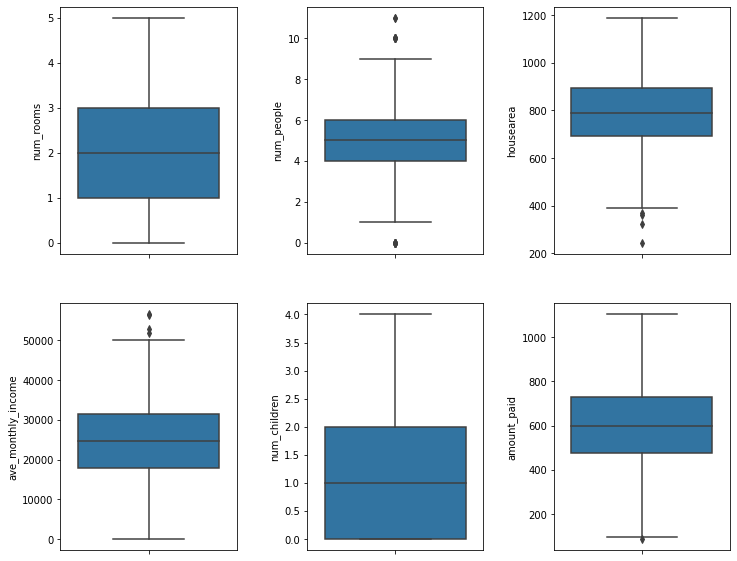

In [ ]:
#Box plot untuk melihat sebaran data termasuk outliers
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.2, wspace=0.4)

for no,col in enumerate(dfn.columns.values.tolist(),1):
  plt.subplot(2,3,no)
  sns.boxplot(y=df[str(col)])
  #print(no, col)

plt.show()

In [ ]:
#mengecek dan mengatasi outlier
print("Sebelum handling outlier")
for column in dfn.columns.values.tolist():
  Q1 = df[str(column)].quantile(0.25)
  Q3 = df[str(column)].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  print(f'Jumlah outliers di {column}: { len(df[str(column)]) - ((df[str(column)] >= low_limit) & (df[str(column)] <= high_limit)).sum()}')
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

print("\nSetelah handling outlier")
for column in dfn.columns.values.tolist():
  Q1 = df[str(column)].quantile(0.25)
  Q3 = df[str(column)].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[str(column)] >= low_limit) & (df[str(column)] <= high_limit)]
  print(f'Jumlah outliers di {column}: { len(df[str(column)]) - ((df[str(column)] >= low_limit) & (df[str(column)] <= high_limit)).sum()}')

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Sebelum handling outlier
Jumlah outliers di num_rooms: 0
Jumlah outliers di num_people: 24
Jumlah outliers di housearea: 4
Jumlah outliers di ave_monthly_income: 4
Jumlah outliers di num_children: 0
Jumlah outliers di amount_paid: 1
Jumlah baris sebelum memfilter outlier: 1000

Setelah handling outlier
Jumlah outliers di num_rooms: 0
Jumlah outliers di num_people: 0
Jumlah outliers di housearea: 0
Jumlah outliers di ave_monthly_income: 0
Jumlah outliers di num_children: 0
Jumlah outliers di amount_paid: 0
Jumlah baris setelah memfilter outlier: 968


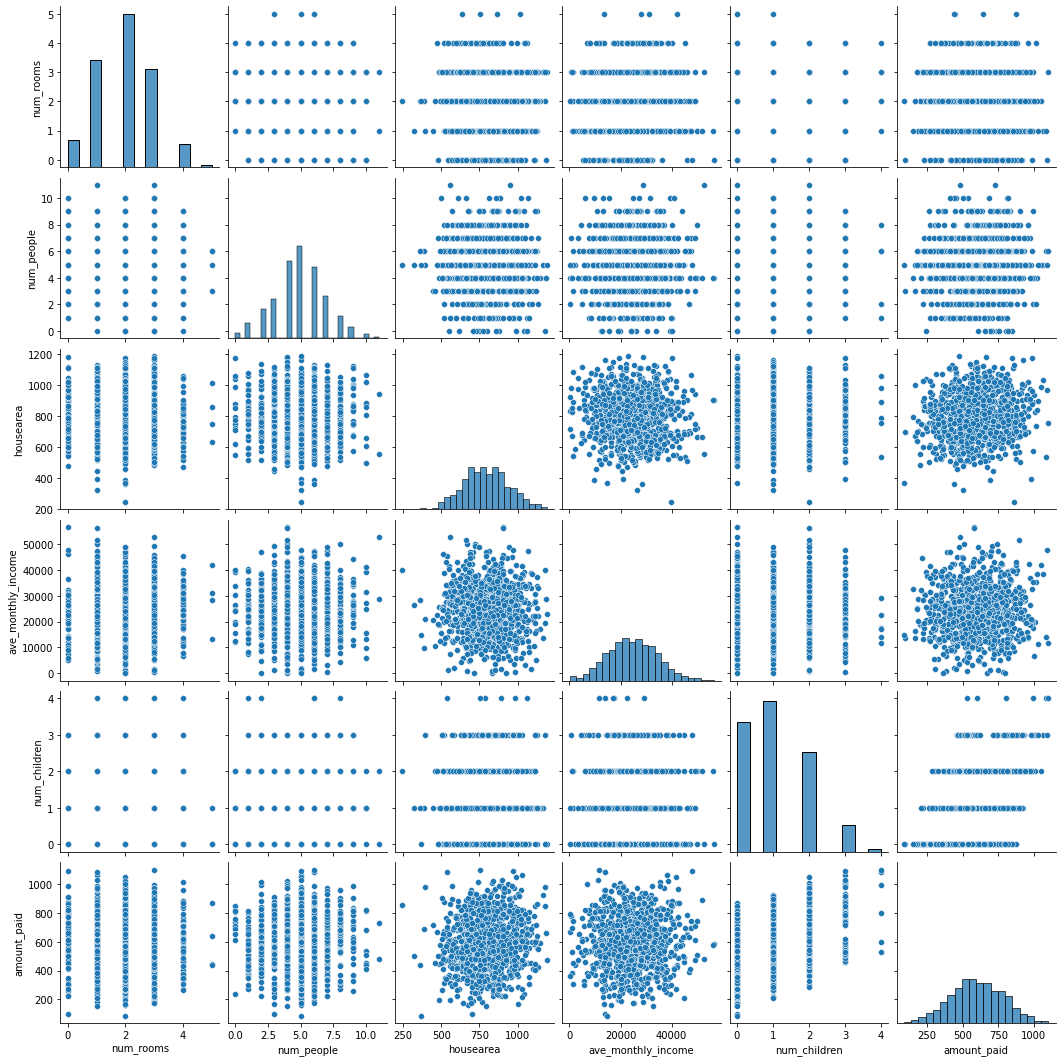

In [ ]:
#pairplot untuk cek relasi antar data
sns.pairplot(dfn)
plt.savefig("pairplot")

In [ ]:
dfn.corr()

,num_rooms,num_people,housearea,ave_monthly_income,num_children,amount_paid
num_rooms,1.000000,-0.000329,-0.038663,-0.007298,-0.036896,-0.021945
num_people,-0.000329,1.000000,-0.000257,0.020464,-0.010020,0.052649
housearea,-0.038663,-0.000257,1.000000,-0.042443,0.038699,0.096157
ave_monthly_income,-0.007298,0.020464,-0.042443,1.000000,0.009192,0.025350
num_children,-0.036896,-0.010020,0.038699,0.009192,1.000000,0.447512
amount_paid,-0.021945,0.052649,0.096157,0.025350,0.447512,1.000000


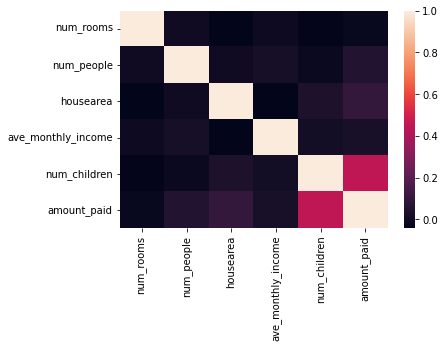

In [ ]:
sns.heatmap(dfn.corr())

In [ ]:
#membuat variabel X
x = df.drop('amount_paid',axis=1)
#membuat variabel y
y = df['amount_paid']

In [ ]:
# import train_test_split dari sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# import linear regressiom
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
model = LR.fit(x_train,y_train)

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([ 595.38225526,  848.86862611,  689.65336247,  678.59814762,
        338.03452661,  635.90514473,  468.17313832,  652.29142058,
        429.12016714,  371.0731579 ,  862.14905459,  626.64859709,
        532.01189484,  360.11482121,  364.030401  ,  733.84299209,
        812.84841726,  535.3534924 ,  719.91632601,  680.95685757,
        357.28114117,  349.44927122,  738.32302514,  647.37623432,
        497.99423132,  710.5996003 ,  695.81884227,  414.07381707,
        408.85723047,  933.23710602,  647.49354925,  609.89049373,
        757.38680671,  757.28388294,  340.39323687,  481.11178777,
        530.20217586,  746.86493215,  589.85746058,  755.17242376,
        842.22526505,  372.4305516 ,  362.63151231,  373.33886722,
        450.14652725,  455.27249551,  602.55923565,  702.34469429,
        702.15767657,  434.76514636,  921.46731095,  739.74751949,
        380.44662143,  754.79757936,  771.66778327,  899.08811824,
        780.01062929,  858.00370153,  691.78061569,  659.21323

In [ ]:
#model validation
#importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("Nilai R^2 : ",score)
print('Nilai MAE : ', mean_absolute_error(y_test, y_prediction))
print("Nilai MSE : ",mean_squared_error(y_test,y_prediction))
print("Nilai RMSE : ",np.sqrt(mean_squared_error(y_test,y_prediction)))

print('\nIntercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f'Y = {model.intercept_} + ({model.coef_[0]})X1 + ({model.coef_[1]})X2 + ({model.coef_[2]})X3 + ({model.coef_[3]})X4 + ({model.coef_[4]})X5 + ({model.coef_[5]})X6 + ({model.coef_[6]})X7 + ({model.coef_[7]})X8 + ({model.coef_[8]})X9 ')

Nilai R^2 :  0.8806551597747548
Nilai MAE :  54.78354085393933
Nilai MSE :  4124.886328114505
Nilai RMSE :  64.22527795280068

Intercept: 113.29635062613625
Coefficients: [7.10348641e-01 6.32600013e+00 3.59426844e-02 1.59305625e+02
 7.29050059e+01 5.81482695e+01 1.17021567e-03 9.05103574e+01
 2.50689597e+02]
Y = 113.29635062613625 + (0.7103486411802008)X1 + (6.326000126490252)X2 + (0.0359426844186104)X3 + (159.3056248730348)X4 + (72.90500591034122)X5 + (58.148269533039866)X6 + (0.0011702156661064222)X7 + (90.51035740919401)X8 + (250.6895971345677)X9 


In [ ]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
compare

,Actual,Predicted
590,589.563311,595.382255
267,783.525579,848.868626
402,705.261410,689.653362
510,658.320574,678.598148
72,390.598628,338.034527
...,...,...
993,495.844286,570.085933
763,694.535841,735.585844
793,741.814894,630.938262
33,715.573846,650.981332


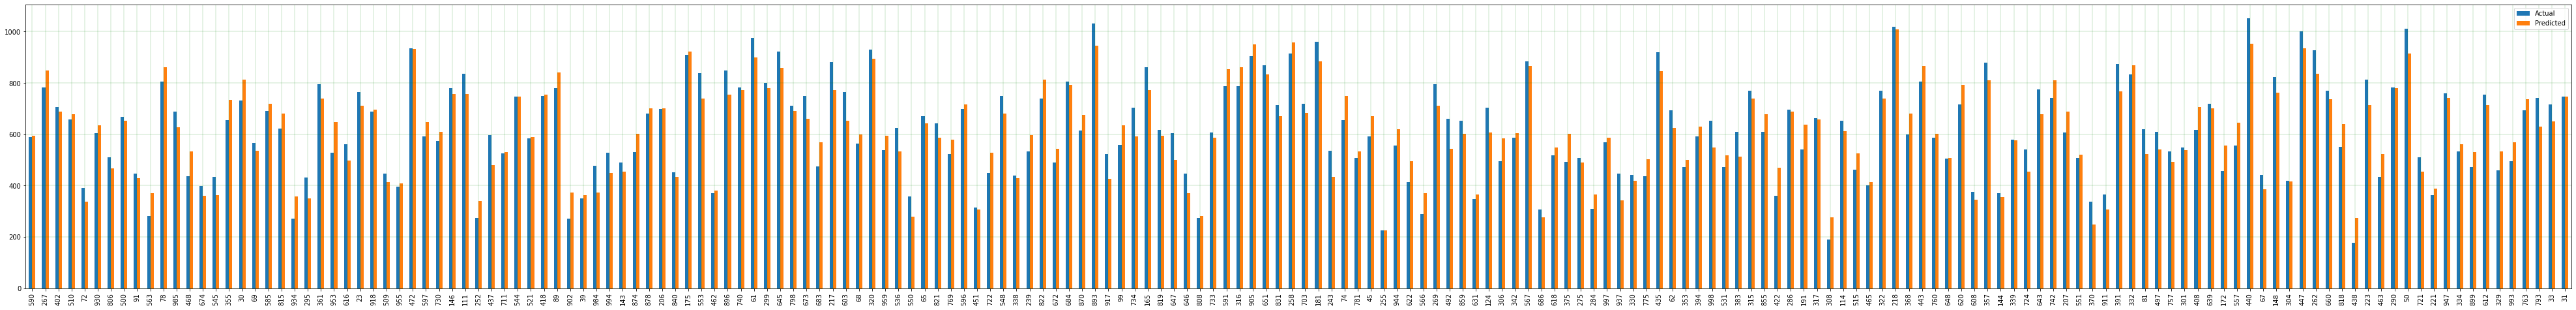

In [ ]:
#plot compare predict dan actual
compare.plot(kind='bar',figsize=(70,8))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()

In [ ]:
eror = np.absolute(compare['Actual'] - compare['Predicted'])

In [ ]:
eror

590      5.818944
267     65.343048
402     15.608048
510     20.277574
72      52.564101
          ...    
993     74.241647
763     41.050003
793    110.876632
33      64.592514
31       0.181657
Length: 194, dtype: float64

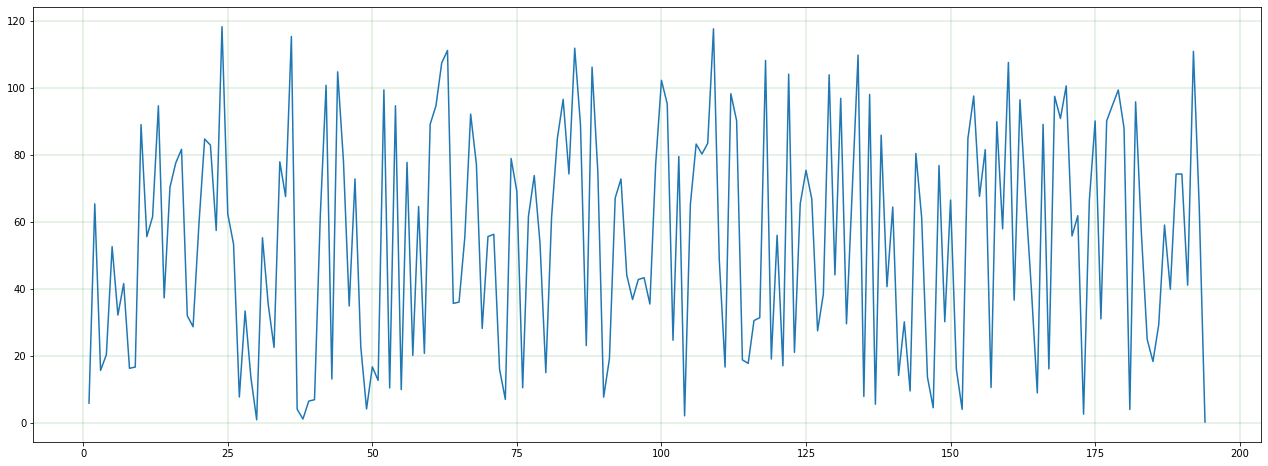

In [ ]:
#Plot eror
plt.figure(figsize=(22,8))
plt.plot(list(range(1, len(y_test)+1)), eror)
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()

In [ ]:
rooms = input("Berapa jumlah ruangan dari rumah anda? (isi dalam rentang angka 0-5) ")

people = input("Berapa orang penghuni rumah anda? (isi dalam rentang angka 1-9) ")

area = float(input("Berapa luas rumah anda? (isi dalam rentang angka 445-1170) "))

is_ac = input("Apakah ada AC di rumah anda? (isi dengan y atau n) ")
if is_ac.lower() == ("y" or "yes"):
  ac = 1
else: 
  ac = 0

is_tv = input("Apakah ada TV di rumah anda? (isi dengan y atau n) ")
if is_tv.lower() == ("y" or "yes"):
  tv = 1
else: 
  tv = 0

is_flat = input("Apakah rumah anda berjenis flat? (isi dengan y atau n) ")
if is_flat.lower() == ("y" or "yes"):
  flat = 1
else: 
  flat = 0

income = float(input("Berapa rata-rata penghasilan bulanan anda? (isi dalam rentang angka 40-50000) "))

child = input("Berapa jumlah anak anda? (isi dalam rentang angka 0-4) ")

is_urban = input("Apakah rumah anda terletak di pusat kota? (isi dengan y atau n) ")
if is_urban.lower() == ("y" or "yes"):
  urban = 1
else: 
  urban = 0

x_prediksi = np.array([[rooms, people, area, ac, tv, flat, income, child, urban]])
prediksi = model.predict(x_prediksi)
print(f'Prediksi tagihan listrik anda sebesar: {prediksi}')

Berapa jumlah ruangan dari rumah anda? (isi dalam rentang angka 0-5) 3
Berapa orang penghuni rumah anda? (isi dalam rentang angka 1-9) 3
Berapa luas rumah anda? (isi dalam rentang angka 445-1170) 5000
Apakah ada AC di rumah anda? (isi dengan y atau n) n
Apakah ada TV di rumah anda? (isi dengan y atau n) y
Apakah rumah anda berjenis flat? (isi dengan y atau n) n
Berapa rata-rata penghasilan bulanan anda? (isi dalam rentang angka 40-50000) 10000
Berapa jumlah anak anda? (isi dalam rentang angka 0-4) 3
Apakah rumah anda terletak di pusat kota? (isi dengan y atau n) n
Prediksi tagihan listrik anda sebesar: [-490.04840206]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
